<a href="https://colab.research.google.com/github/HongWonSeok/hairloss/blob/main/Final_HW_%EC%9D%BC%EB%8B%A8%EC%97%AC%EA%B8%B0%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

자료 출처 : https://www.idai.or.kr/user/data_market/detail.do?id=389a44b0-4e17-11ea-9259-977b63f3ed80

**연령,성별 등을 대표 할 수 있는 탈모 DNA정보 데이터이다. DNA정보 및 라이프스타일, 스트레스, 두피 부위별 현미경 검사에대한 자료들이 담겨져있다.**

이 데이터는 총 615명의 남녀에 대한 데이터이다.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/HongWonSeok/hairloss/main/hairlossdata.csv',encoding='CP949')
df.head()


,성별,세대,C-DNA-IL2RA,G-DNA- CTLA4,A-DNA-Chr20P11,G-DNA-HLA-DQB1,RNA-5alphaCt(dR),RNA-GapCt(dR),RNA-ddCt,RNA-개인수치,RNA-변환 값,수식,RNA 비교-남자비교,RNA 비교-여자비교,RNA 비교-10대비교,RNA 비교-20대비교,RNA 비교-30대비교,RNA 비교-40대비교,RNA 비교-50대비교,RNA 비교-정상인비교,물리검사(인장강도)-앞,물리검사(인장강도)-중앙,물리검사(인장강도)-뒤,tensile strength test-hairloss,물리검사(인장강도)-평균,물리검사(인장강도) 비교수치-남자비교,물리검사(인장강도) 비교수치-여자비교,물리검사(인장강도) 비교수치-10대비교,물리검사(인장강도) 비교수치-20대비교,물리검사(인장강도) 비교수치-30대비교,물리검사(인장강도) 비교수치-40대비교,물리검사(인장강도) 비교수치-50대비교,물리검사(인장강도) 비교수치-정상인비교,optical inspection-front,optical inspection-center,optical inspection-occipital,optical inspection-hairloss,optical inspection-mean,광학검사(현미경) 비교수치-남자비교,광학검사(현미경) 비교수치-여자비교,광학검사(현미경) 비교수치-10대비교,광학검사(현미경) 비교수치-20대비교,광학검사(현미경) 비교수치-30대비교,광학검사(현미경) 비교수치-40대비교,광학검사(현미경) 비교수치-50대비교,광학검사(현미경) 비교수치-정상인비교,life style - external factors,life style-internal factor,life style - mental health,life style - nutritional status,life style - total,가족탈모 여부,체모,아토피 여부,갑상선 질환 여부,알러지 비염 여부,샴푸 횟수,샴푸 후 헹굼,모자 착용,두피 타입,매달 염색 파마를 한다,수면 시간,쉽게 피곤함을 느낀다,"일주일에 3회 이상, 5잔 이상의 술을 마신다",최소 하루 한 끼의 규칙적인 식사를 한다,하루에 담배를 반 갑 이상 피운다,땀이 날 정도의 운동,속쓰림이 있다,소화불량이 있다,주 3회 이상 섭취하는 음식에 체크,혼자라는 느낌이 들고 외롭다,무기력하다,감정을 솔직히 드러내는 편이다,"취미, 여가 활동을 일주일에 1회 이상 한다",한 달에 1회 이상 모임을 갖는다
0,man,20대,CC,GA,GA,GA,32.22,31.24,0.506980,225.9268003,FALSE,FALSE,109.9739132,FALSE,FALSE,FALSE,145.041151,55.9,93.4,54.2,51.4,63.725,0.7072697,NaN,FALSE,0.661596761,FALSE,FALSE,FALSE,0.704922566,22.2,25,20.80,19.90,21.975,0.708870968,NaN,NaN,0.68671875,FALSE,FALSE,FALSE,0.702076677,87,92.5,47.0,22.0,62.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,man,20대,CC,GA,GA,GA,27.49,23.02,0.045123,20.10819401,FALSE,FALSE,9.788023289,FALSE,FALSE,FALSE,12.90911746,122.1,130.9,119.3,116.0,122.075,1.354883463,NaN,FALSE,1.26738995,FALSE,FALSE,FALSE,1.350387168,36.4,43.52,42.64,33.76,39.080,1.260645161,NaN,NaN,1.22125,FALSE,FALSE,FALSE,1.2485623,95,85,4.0,40.0,56.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,woman,20대,CC,GA,GA,GA,35.64,33.82,0.283221,FALSE,97.68058937,FALSE,61.43621938,FALSE,FALSE,FALSE,81.02630623,106.5,73.1,64.6,48.3,73.125,FALSE,0.734925,FALSE,0.759188123,FALSE,FALSE,FALSE,0.808904867,34.88,35.04,25.84,24.16,29.980,FALSE,0.951746,NaN,0.936875,FALSE,FALSE,FALSE,0.957827476,76.5,72.5,52.0,44.0,61.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,man,20대,TT,GA,GA,GG,29.45,27.65,0.287175,127.9744157,FALSE,FALSE,62.29383704,FALSE,FALSE,FALSE,82.15739131,54.2,88.1,100.2,37.6,70.025,0.777192009,NaN,FALSE,0.727003738,FALSE,FALSE,FALSE,0.774612832,20.8,35.6,29.92,21.68,27.000,0.870967742,NaN,NaN,0.84375,FALSE,FALSE,FALSE,0.862619808,85,87.5,37.0,26.0,58.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,woman,30대,CC,GA,AA,GG,38.36,30.30,0.003747,FALSE,1.292352831,FALSE,FALSE,1.37559672,FALSE,FALSE,1.072010078,65.7,28.8,27.0,60.6,45.525,FALSE,0.457538,FALSE,FALSE,0.472643272,FALSE,FALSE,0.503595133,28.8,23.52,17.44,23.12,23.220,FALSE,0.737143,NaN,FALSE,0.749032258,FALSE,FALSE,0.741853035,60,77.5,45.0,55.0,59.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**데이터상의 남자와 여자의 비율**

이 데이터는 약71.7%의 남성과 28.3%의 여성의 데이터로 이루어져 있다. 

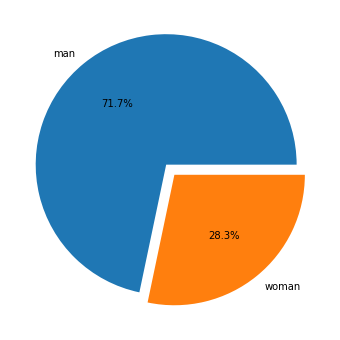

In [5]:

genderCount = df['성별'].value_counts(normalize =True)
fig,ax = plt.subplots(figsize=(6,6))

ax.pie(genderCount,
       labels=genderCount.index,
       explode=[0.05,0.05],
       autopct="%1.1f%%"
       )
plt.show()


**광학 검사(현미경)에 대한 탈모 진행 상태이다.**

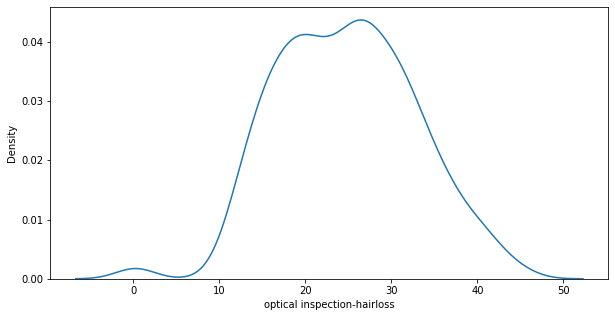

In [8]:
hair=df['optical inspection-hairloss'].dropna(axis=0)
d=hair.index
fig ,ax = plt.subplots(figsize=(10,5))

sns.kdeplot(data=d,x=hair)

**라이프 스타일**

외부적 요인, 내부적 요인, 영양상태에 대한 통계이며, 오른쪽 하단 histplot은 각각의 사람에 대한 외부적 요인, 내부적 요인, 영양상태의 평균값을 나타낸다. 

아래의 자료를 볼때, 각기 다른 라이프 스타일을 가지고 있다. 평범하게 일상을 보내는 사람들은 보통 50-80수치를 가진 사람들이 많이 나타난다. 이 점을 보아 라이프 스타일에 탈모가 미치는 영향이 없다고 볼 수는 없지만 그렇게 크게 영향을 끼치지는 않는 것 처럼 보인다..

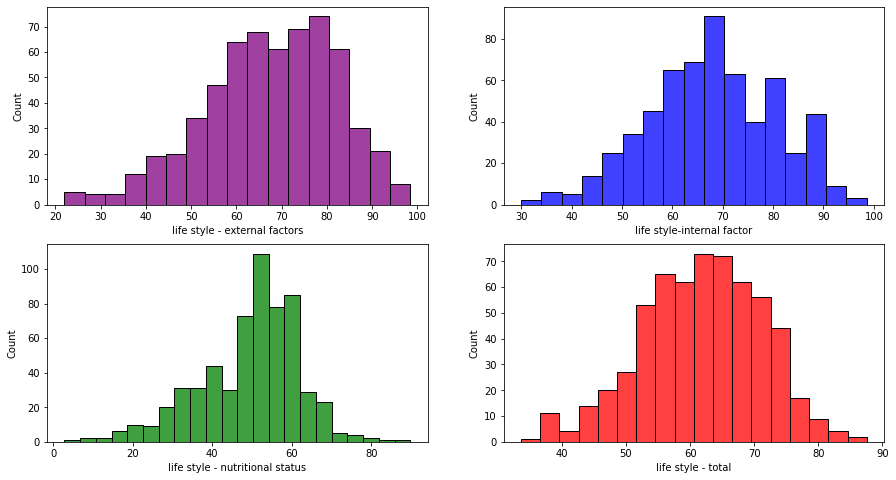

In [9]:
import seaborn as sns
# subplot들을 만든다.
fig,ax = plt.subplots(2,2,figsize=(15,8))
attribute1='life style - external factors'
attribute2='life style-internal factor'
attribute3='life style - nutritional status'
totattribute='life style - total'

# 각각의 subplot에 histplot으로 데이터를 채워준다.
sns.histplot(data=df,x=attribute1,color = "purple",ax=ax[0,0])
sns.histplot(data=df,x=attribute2,color = "blue", ax=ax[0,1])
sns.histplot(data=df,x=attribute3,color = "green", ax=ax[1,0])
sns.histplot(data=df,x=totattribute,color = "red", ax=ax[1,1])



**외부적 요인, 내부적 요인, 영양 상태에 대한 평균**

더 자세히 보기 위해 외부적 요인, 내부적 요인, 영양상태에 대한 각각의 평균을 추려보았다.

각각의 평균을 보게되면 각각 외부적요인은 67.51863560732104, 내부적 요인은 67.80836106489187, 영양상태는 49.57114093959732의 추치를 가지고 있다. 이 데이터를 가지고 각각의 수치에 대한 평균을 보았을 때 외부적 요인, 내부적 요인에 대해 탈모는 크게 영향을 주는 것 같지 않은 것 처럼 보인다. 그러나 영양상태는 49.57114093959732로 빈약한 수치를 나타내는 것으로 보인다. 이점으로 보아, 영양상태는 탈모에 영향을 어느정도 끼치는 것으로 보인다.

In [10]:
# 외부적 요인에 대한 평균
externmean=df[attribute1].mean()
externmean

67.51863560732104

In [11]:
#내부적요인에 대한 평균
internmean=df[attribute2].mean()
internmean

67.80836106489187

In [12]:
#영양 상태에 대한평균
nutritionalmean=df[attribute3].mean()
nutritionalmean

49.57114093959732

이것을 한눈에 보기위해 barplot으로 그려보았다.

참조 (https://rfriend.tistory.com/411) 

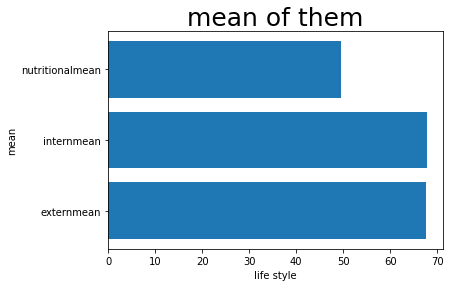

In [13]:
y=[externmean,internmean,nutritionalmean]
x=['externmean','internmean','nutritionalmean']


plt.barh(x,y)
plt.title('mean of them',fontsize=25)
plt.xlabel('life style')
plt.ylabel('mean')

plt.show()

**Classsification**

In [50]:
C_df=df.dropna(subset=[attribute1,attribute2,attribute3,'optical inspection-hairloss'])

X=C_df[[attribute1,attribute2,attribute3]].astype('int')
Y=C_df['optical inspection-hairloss'].astype('int')

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(
    X,Y,test_size=0.3,random_state=0)

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score

model = SVC(gamma='auto')
model.fit(X_train,Y_train)

predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print("F1-Score:",f1_score(Y_test,predictions,average='micro'))

              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         9
          19       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         6
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00        10
          23       0.00      0.00      0.00         4
          24       0.00      0.00      0.00        10
          25       0.06      1.00      0.11         8
          26       0.00      0.00      0.00        12
          27       0.07      0.25      0.11         4
          28       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


참조(https://pythonq.com/so/python/660754)

n_neighbors=14인경우가 제일 좋은 결과가 도출되었다.

In [100]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=14)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy:",accuracy_score(Y_test,predictions))
print("Precision:",precision_score(Y_test,predictions,average='micro'))
print("Recall:",recall_score(Y_test,predictions,average='micro'))
print("F1-Score:",f1_score(Y_test,predictions,average='micro'))


Accuracy: 0.061452513966480445
Precision: 0.061452513966480445
Recall: 0.061452513966480445
F1-Score: 0.061452513966480445


**탈모 가족력 데이터**

In [9]:
#탈모 가족력에 대한 데이터이다.
df['가족탈모 여부']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
610    mother side
611             no
612           both
613             no
614    father side
Name: 가족탈모 여부, Length: 615, dtype: object

**탈모 가족력에 대해 예외 처리한 부분**



예외 처리 결과 총 615명의 대상중 379명 만이 이 항목에 대해 설문참여를 해주었다.

이 자료에서 알아야 하는 것은 father side는 아버지쪽 사촌까지 다 포함 하고있고, mother side는 어머니쪽 사촌까지 다 포함 하고있다. 그러나 몇대까지(위로 할아버지 할머니 그 이상을 포함하는지)의 자료인지는 정확히 모르기 때문에 이자료를 완전히 신뢰 할 수는 없다.

In [10]:
# 탈모 가족력에 대한 NAN값을 예외처리 한다. 
familyhairloss = df['가족탈모 여부'].dropna(axis=0)
familyhairloss

233             no
234    mother side
236    father side
237             no
239    father side
          ...     
610    mother side
611             no
612           both
613             no
614    father side
Name: 가족탈모 여부, Length: 379, dtype: object

참조 (https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)

자세히 보기위해 plot을 그려주었다.

plot을 보게되면 탈모 보유자중 가족력이 없는 경우도 있지만 탈모 가족력이 있는 데이터들을 합치면 탈모 가족력이 없는 데이터의 2배정도 되는 것으로 보인다. 이 데이터로 보았을 때, 가족에 탈모가 있을 경우 본인도 탈모가 있을 확률이 있는 것으로 보인다. 

다시한번 말하지만 이 자료는 위로 몇대까지 탈모가 있는지 수집한 자료가 아니므로 설득력은 떨어지지만 당장 아버지쪽, 어머니쪽 사촌까지의 자료만 보아도 가족에 탈모가 있으면 본인도 탈모발생을 할 수 있는 확률이 있다고 볼 수 있다.

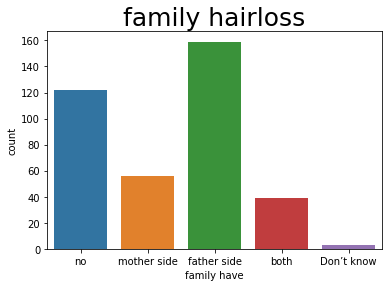

In [11]:
x=familyhairloss.index

#countplot을 활용하여 값별로
sns.countplot(x=x,data=familyhairloss)
plt.title('family hairloss',fontsize=25)
plt.xlabel('family have')
plt.ylabel('count')

plt.show()

**광학검사(현미경)와 물리 검사(인장강도)의 상관관계**

이 자료에서 현미경검사와 인장강도에 대한검사를 실시하였다. 이 두개의 데이터로 상관 관계를 나타내본다.

수치가 1에 가까울 수록 관계가 깊고 0에 가까울 수록 관계가 적다. 아래 결과를 보면 현미경 검사결과 탈모율이 진행되는 상태와 두피에대한 인장 강도에 대한 correlation값이 매우 높게 나왔다. 이 말은 인장강도와 탈모 진행 상태와의 관계가 밀접하다는 것을 알 수있다.

참조(https://youngwonhan-family.tistory.com/62)

In [46]:
data=df[['tensile strength test-hairloss','optical inspection-hairloss']].dropna(axis=0)

corr_data = data.corr()
corr_data = corr_data.apply(lambda x: round(x,2))
corr_data

,tensile strength test-hairloss,optical inspection-hairloss
tensile strength test-hairloss,1.00,0.83
optical inspection-hairloss,0.83,1.00
